In [3]:
import scipy
import phase_portr as pp
import math

import ipywidgets as wd
import numpy as np
import matplotlib.pyplot as plt
import sympy as symp
%matplotlib inline

import ipywidgets as wd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Define 
x,y, t=symp.symbols('x y t')


f=y*(1-x**2)
g=-x*(1-y**2)
J = symp.Function('J')(x,y)

## Change here for new problem

In [27]:
f=x**2-y**2
g=x*y-1


In [28]:

def rhs(xy,t):
    xv,yv=xy
    rhs_symp=symp.lambdify((x,y),[f,g])
    return np.array(rhs_symp(xv,yv))


In [29]:

print('f=',f)
print('g=',g)

### Isoclines

xiso=symp.solve(f)
yiso=symp.solve(g,y)

print('f = 0 when', xiso)
print('g = 0 when y=', yiso)

### Equilibrium points
eqpnts=symp.solve([f,g],(x,y))
print('Equilibrium points. ', eqpnts)

### Jacobian
J=symp.Matrix([f,g]).jacobian([x,y])
print('Jacobian J=',J)

print('Eigenvalues:', J.subs(eqpnts).eigenvals())

print()

print('Eigenvectors: ')
symp.pprint(J.subs(eqpnts).eigenvects())



f= x**2 - y**2
g= x*y - 1
f = 0 when [{x: -y}, {x: y}]
g = 0 when y= [1/x]
Equilibrium points.  [(-1, -1), (1, 1), (-I, I), (I, -I)]
Jacobian J= Matrix([[2*x, -2*y], [y, x]])
Eigenvalues: {3*x/2 - sqrt(x**2 - 8*y**2)/2: 1, 3*x/2 + sqrt(x**2 - 8*y**2)/2: 1}

Eigenvectors: 
⎡⎛         ___________     ⎡⎡       4⋅y        ⎤⎤⎞  ⎛         ___________     
⎢⎜        ╱  2      2      ⎢⎢──────────────────⎥⎥⎟  ⎜        ╱  2      2      
⎢⎜3⋅x   ╲╱  x  - 8⋅y       ⎢⎢       ___________⎥⎥⎟  ⎜3⋅x   ╲╱  x  - 8⋅y       
⎢⎜─── - ──────────────, 1, ⎢⎢      ╱  2      2 ⎥⎥⎟, ⎜─── + ──────────────, 1, 
⎢⎜ 2          2            ⎢⎢x + ╲╱  x  - 8⋅y  ⎥⎥⎟  ⎜ 2          2            
⎢⎜                         ⎢⎢                  ⎥⎥⎟  ⎜                         
⎣⎝                         ⎣⎣        1         ⎦⎦⎠  ⎝                         

⎡⎡       4⋅y        ⎤⎤⎞⎤
⎢⎢──────────────────⎥⎥⎟⎥
⎢⎢       ___________⎥⎥⎟⎥
⎢⎢      ╱  2      2 ⎥⎥⎟⎥
⎢⎢x - ╲╱  x  - 8⋅y  ⎥⎥⎟⎥
⎢⎢                  ⎥⎥⎟⎥
⎣⎣        1         ⎦⎦⎠

In [48]:
for ii in np.arange(len(eqpnts)):
    print(eqpnts[ii])


(-1, -1)
(1, 1)
(-I, I)
(I, -I)


## Prepare the plot

except, possibly complext root
except, possibly complext root


(-2.0, 2.0)

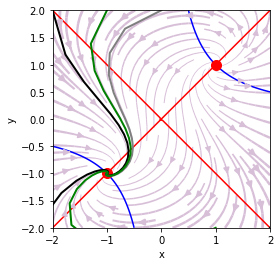

In [52]:

# Set up the figure
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')

# Build the plot
a_range = [-2, 2]
b_range = [-2, 2]
ax = pp.plot_flow_field(ax, rhs, a_range, b_range)
for ii in np.arange(len(eqpnts)):   
    try:
        ax = pp.plot_fixed_points(ax, eqpnts[ii] ,color='red')
    except:
        print('except, possibly complext root') 
            
ax = pp.plot_nullcl(ax, rhs, [-2, 2], [-2, 2], args=(), n_grid=100)
ax = pp.plot_traj(ax, rhs, np.array([-1, -1]), np.linspace(0, 10, 50), color=np.array([0.5, 0.5, 0.5]), lw=2)
ax = pp.plot_traj(ax, rhs, np.array([0, 2]), np.linspace(0, 10, 50), color=np.array([0.5, 0.5, 0.5]), lw=2)

ax = pp.plot_traj(ax, rhs, np.array([-2, 2]), np.linspace(0, 10, 50), color='black', lw=2)
ax = pp.plot_traj(ax, rhs, np.array([2, -2]), np.linspace(0, 10, 50), color='black', lw=2)

ax = pp.plot_traj(ax, rhs, np.array([-1, 2]), np.linspace(0, 10, 50), color='green', lw=2)
ax = pp.plot_traj(ax, rhs, np.array([1, -2]), np.linspace(0, 10, 50), color='green', lw=2)
plt.xlim(a_range)
plt.ylim(b_range)